<a href="https://colab.research.google.com/github/MahamadSahjad/House_Price_Prediction/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np


In [13]:
import pandas as pd

In [14]:
np.random.seed(42)

In [15]:
size = np.random.randint(500,5000,1000)
bedrooms = np.random.randint(1,6,1000)
location = np.random.randint(1,11,1000)
age = np.random.randint(1,51,1000)

In [16]:
price = (size*300)+(bedrooms*50000)+(location*20000)-(age*2000)+ np.random.randint(-20000,20000,1000)

In [17]:
df = pd.DataFrame({"Size":size,"Bedrooms":bedrooms,"Location":location,"Age":age,"Price":price})

In [18]:
csv_filename = "House_Price_Data.csv"
df.to_csv(csv_filename,index = False)


In [20]:
print(f"Dataset saved as '{csv_filename}' with {df.shape[0]} rows and {df.shape[1]} columns.")

Dataset saved as 'House_Price_Data.csv' with 1000 rows and 5 columns.


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Select features & target
X = df[['Size', 'Bedrooms', 'Location', 'Age']]
y = df['Price']

# Split data into training & testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Performance
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("R² Score:", r2)
print(f"\nModel Performance:\n MAE: {mae:.2f}, R² Score: {r2:.2f}")

Mean Absolute Error: 9731.147529877839
R² Score: 0.9991518235784612

Model Performance:
 MAE: 9731.15, R² Score: 1.00


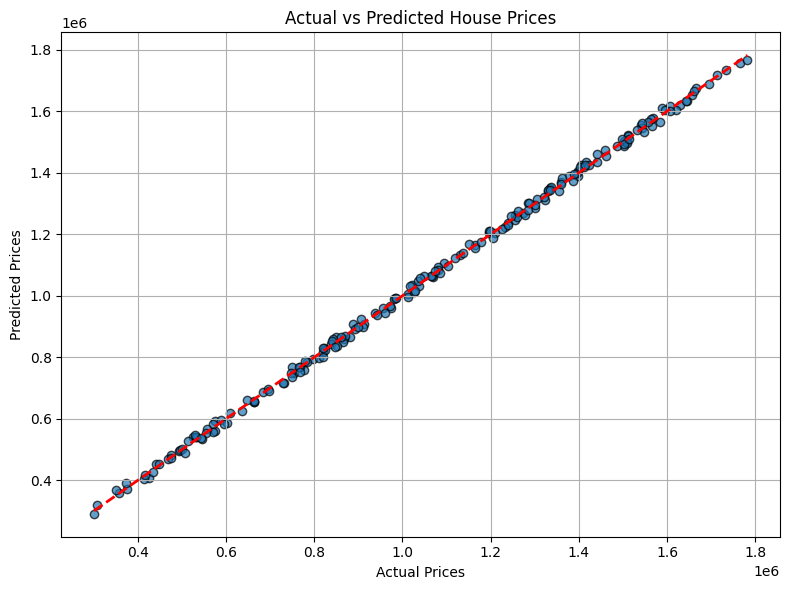

In [24]:
# Scatter plot of actual vs predicted prices
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, edgecolors='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.tight_layout()
plt.show()